In [36]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
from scipy import fftpack
from matplotlib.colors import LogNorm

(-0.5, 1289.5, 814.5, -0.5)

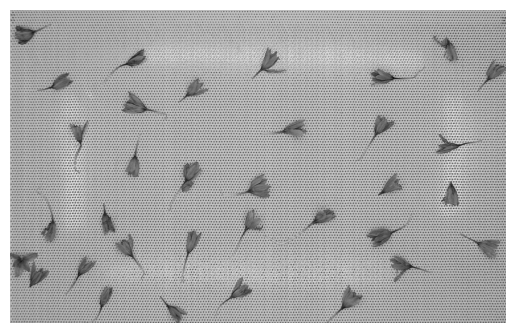

In [35]:
path = "images/img_01.jpg"
img = cv2.imread(path, 0)
plt.imshow(img, cmap="gray")
plt.axis('off')

Text(0.5, 1.0, 'Fourier Transform')

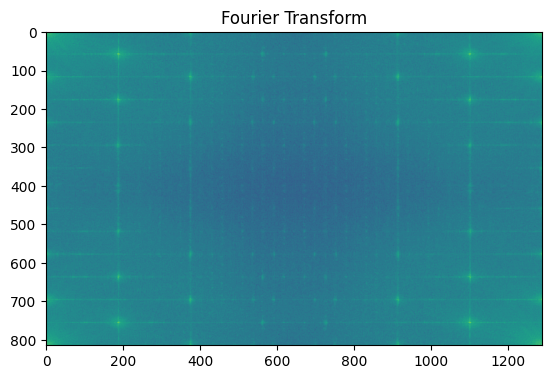

In [73]:
# https://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_fft_image_denoise.html
im_fft = fftpack.fft2(img)
plt.figure()
plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
plt.title('Fourier Transform')

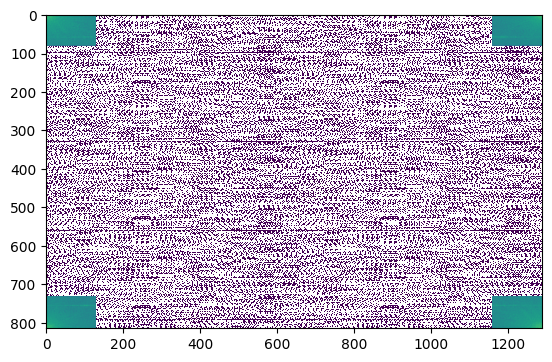

In [51]:
k = 0.1
im_fft2 = im_fft.copy()
x, y = im_fft2.shape
im_fft2[int(x*k):int(x*(1-k))] = 0
im_fft2[:, int(y*k):int(y*(1-k))] = 0
plt.figure()
plt.imshow(np.abs(im_fft2), norm=LogNorm(vmin=5))

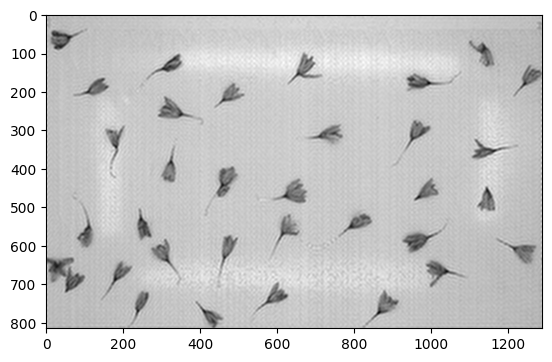

In [141]:
im_new = fftpack.ifft2(im_fft2).real
cv2.imwrite("images/img_03.jpg", im_new)
plt.figure()
plt.imshow(im_new, plt.cm.gray)

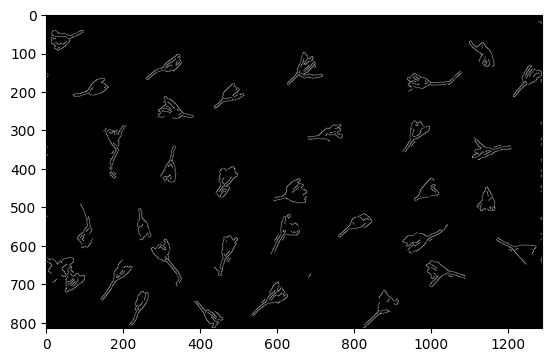

In [72]:
image = cv2.imread("images/img_03.jpg")
im_edges = cv2.Canny(image,50,100)
cv2.imwrite("images/img_04.jpg", im_edges)
plt.figure()
plt.imshow(im_edges, plt.cm.gray)

In [184]:
image = cv2.imread("images/img_04.jpg")
sobelX = cv2.Sobel(src = image, ddepth = cv2.CV_64F, dx = 1, dy = 0, ksize = 1)
sobelY = cv2.Sobel(src = image, ddepth = cv2.CV_64F, dx = 0, dy = 1, ksize = 1)
gradien_directions = np.arctan2(sobelX, sobelY) * 180 / np.pi
# print(sobelX)
# print(sobelY)
print(gradien_directions)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


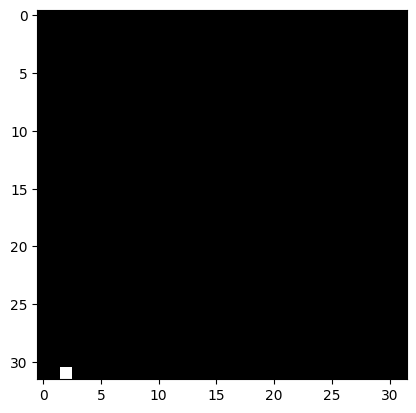

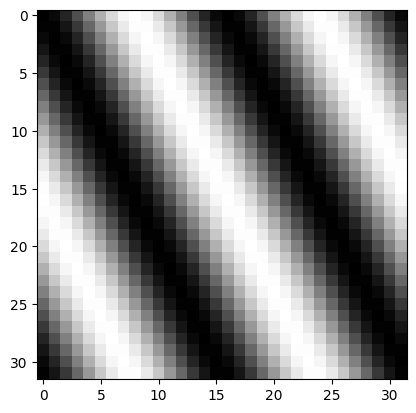

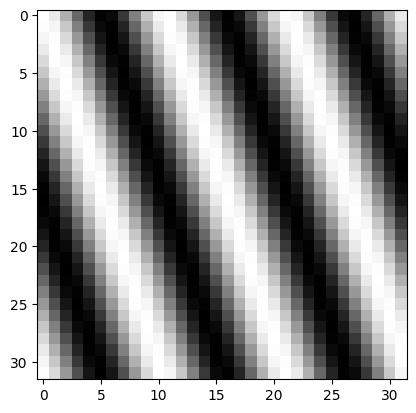

In [186]:
mat = np.zeros((32, 32))
mat[31][2] = 255
plt.imshow(np.abs(mat), cmap="gray")

mat_fft = np.fft.fftshift(np.fft.fft2(mat))
plt.figure()
plt.imshow((mat_fft).real, cmap="gray")

mat[31][2] = 0
mat[31][3] = 255
mat_fft = np.fft.fftshift(np.fft.fft2(mat))
plt.figure()
plt.imshow((mat_fft).real, cmap="gray")

In [180]:
mat1 = np.zeros((5,5))
for i in range(5):
    mat1[i][2] = 10
print(mat1)

mat2 = np.zeros((5,5))
mat3 = np.zeros((5,5))

mat2 = cv2.Sobel(src = mat1, ddepth = cv2.CV_64F, dx=1, dy=0, ksize=1)
mat3 = cv2.Sobel(src = mat1, ddepth = cv2.CV_64F, dx=0, dy=1, ksize=1)

print(mat2)
print(mat3)

[[ 0.  0. 10.  0.  0.]
 [ 0.  0. 10.  0.  0.]
 [ 0.  0. 10.  0.  0.]
 [ 0.  0. 10.  0.  0.]
 [ 0.  0. 10.  0.  0.]]
[[  0.  10.   0. -10.   0.]
 [  0.  10.   0. -10.   0.]
 [  0.  10.   0. -10.   0.]
 [  0.  10.   0. -10.   0.]
 [  0.  10.   0. -10.   0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


0.7274769723288649 148.25616245476817


Text(0.5, 1.0, 'Line')

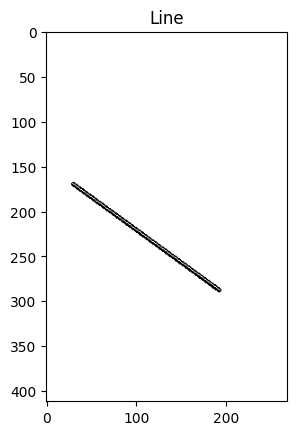

In [132]:
image = cv2.imread("images/img_02.jpg", 0)
img = image.copy()
h = image.shape[0]
w = image.shape[1]
x = []
y = []
xy = []
xx = []

for j in range(h):
    for i in range(w):
        if(image[j][i] != 255):
            x.append(i)
            y.append(j)
l = len(x)

for i in range(l):
    xy.append(x[i] * y[i])

xx = [n * n for n in x]

meanX = np.mean(x)
meanY = np.mean(y)
meanXY = np.mean(xy)
meanXX = np.mean(xx)

m = (meanX * meanY - meanXY) / (meanX * meanX - meanXX)
c = meanY - m * meanX

p1 = (x[0], int(m * x[0] + c))
p2 = (x[-1], int(m * x[-1] + c))

print(m,c)
line = cv2.line(img, p1, p2, (255, 0, 0), 1)
plt.figure()
plt.imshow(line, cmap="gray")
plt.title('Line')
